In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({"time":np.random.exponential(20, size=1000)})

In [6]:
df.head(5)

,time
0,0.334837
1,59.686719
2,15.495570
3,49.830416
4,34.279160


In [8]:
df.describe()

,time
count,1000.000000
mean,20.667914
std,20.026067
min,0.009065
25%,6.145014
50%,14.468428
75%,28.392286
max,131.535511


In [10]:
df = df.sort_values(by='time').reset_index(drop=True)

In [12]:
df.head(5)

,time
0,0.009065
1,0.061235
2,0.064028
3,0.069114
4,0.092225


In [14]:
# Replace the last 30% values with None
df.iloc[-300:, df.columns.get_loc('time')] = None

In [16]:
# Create the 'event' column
df['event'] = df['time'].notnull().astype(int)

In [18]:
df[df['event']==0].shape

(300, 2)

In [20]:
from EM_right_censored_v1 import EM

In [22]:
em1 = EM(table=df, time='time', event='event')

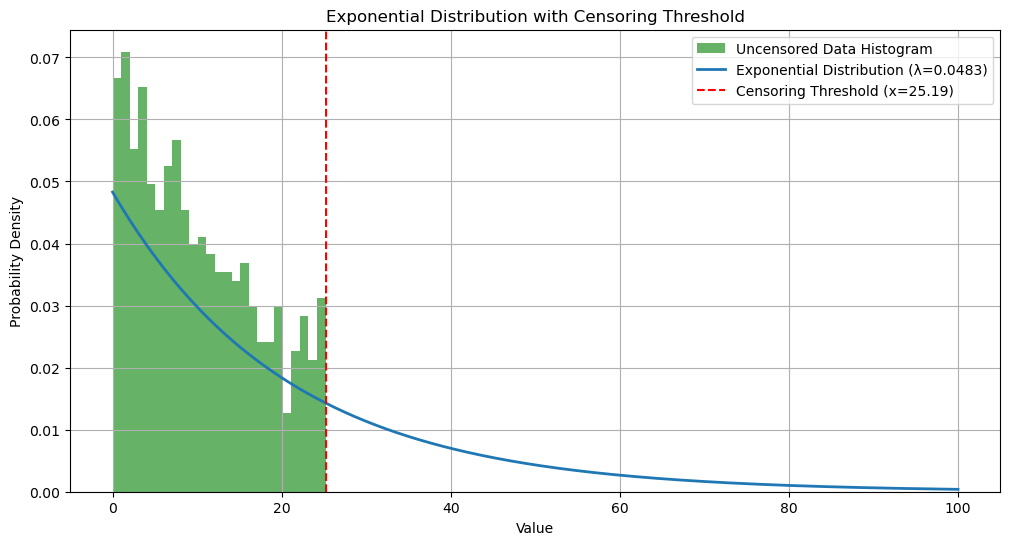

In [24]:
lambda_est, ll = em1.em_algorithm()

In [26]:
lambda_est

0.04829344195454294

In [28]:
print(ll)

[-3337.983386162039, -3157.7883868419776, -3111.8535172975935, -3171.055901892524, -3148.0774719064957, -3127.706256578178, -3126.0922571805495, -3147.854679577313, -3134.9146410931444, -3122.332033803294, -3111.9531485855273, -3122.5059787847886, -3125.6679259348675, -3147.6760765287418, -3111.668803206161, -3158.062516085296, -3136.3768192692496, -3136.5884658156046, -3103.0658003474286, -3108.4959482713202, -3159.3733484134736, -3113.22187953425, -3125.115512923885, -3124.934209859497, -3144.6991477840656, -3123.3141267471074, -3133.4015928518297, -3108.1215233107723, -3132.509781001082, -3120.8103317281953, -3108.841339441614, -3130.3062923844723, -3125.6939816488325, -3087.8513423209347, -3109.0218208590695, -3098.58014109734, -3133.2518284715743, -3100.580987096694, -3137.63750080703, -3103.3213873979194, -3102.4938558530694, -3098.7437027210226, -3131.553969138903, -3137.982322920465, -3107.616274956443, -3159.0296031483113, -3134.8307827544386, -3095.7902492398243, -3170.556193

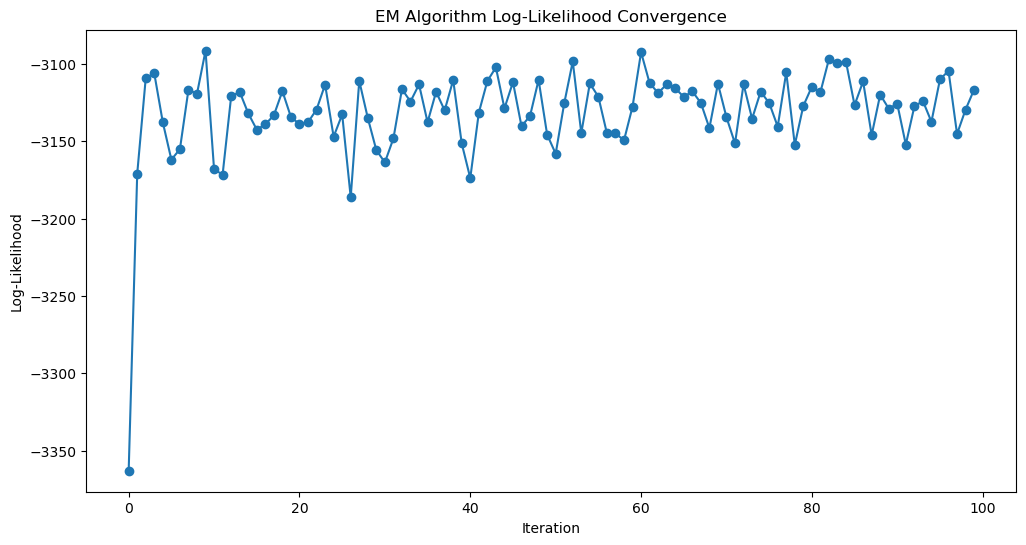

In [30]:
em1.log_likelihood_convergence_plot()